In [322]:
import pandas as pd
import pathlib
import scipy.sparse as sparse
import requests
import numpy as np
from concurrent.futures import ThreadPoolExecutor
import matplotlib.pyplot as plt
import seaborn as sns

In [323]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [324]:
def calculate_cohr(words):
    url = "http://palmetto.demos.dice-research.org/service/npmi?words="
    data = {"words": words}
    
    response = requests.post(url, data=data)
    
    if response.status_code == 200:
        return float(response.text)
    else:
        print("Error:", response.status_code, response.text)
        return None

def parallel_calculate_cohr(topic_keys, max_workers=4):
    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        results = list(executor.map(calculate_cohr, topic_keys))
    return results

In [334]:
path_models = pathlib.Path("/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/data/models/LDA/passage")

In [335]:
models = [dir.name for dir in path_models.iterdir() if dir.is_dir()]

In [336]:
models

['rosie_lg_lda_1_100',
 'rosie_lg_lda_1_300',
 'rosie_lg_lda_1_200',
 'rosie_lg_lda_1_50',
 'rosie_lg_lda_1_500',
 'rosie_lg_lda_1_400',
 'rosie_lg_lda_1_20']

### Models EN

In [337]:
df = pd.read_csv("/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/src/topic_modeling/labels/cohrs_disp_betas_diff.csv")
df = df.sort_values(
    by="Num_Topics",
)
df

Model  Num_Topics  Dispersion EN  Dispersion ES  Diff_Max_Min  \
1     poly_rosie_1_5           5      72.441579      71.689893      0.616840   
2    poly_rosie_1_10          10      55.401555      53.860434      0.729785   
7    poly_rosie_1_15          15      45.713196      43.965223      0.823148   
9    poly_rosie_1_20          20      39.470128      37.590410      0.867937   
5    poly_rosie_1_30          30      31.954992      30.111103      0.915807   
8    poly_rosie_1_50          50      23.744915      22.022193      0.960765   
0   poly_rosie_1_100         100      15.460837      14.102211      0.987841   
3   poly_rosie_1_200         200       9.692789       8.681868      0.999885   
4   poly_rosie_1_300         300       7.271860       6.446753      0.999983   
6   poly_rosie_1_400         400       5.902433       5.206600      1.000000   
10  poly_rosie_1_500         500       4.996027       4.387195      1.000000   

     Mean_JS  \
1   0.469729   
2   0.350708   
7   0.286335   
9   0.245518   
5   0.199919   
8   0.150756   
0   0.099932   
3   0.063570   
4   0.048824   
6   0.043082   
10  0.037988   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [351]:
df.Num_Topics

1       5
2      10
7      15
9      20
5      30
8      50
0     100
3     200
4     300
6     400
10    500
Name: Num_Topics, dtype: int64

In [376]:
df = df[df.Num_Topics < 500]

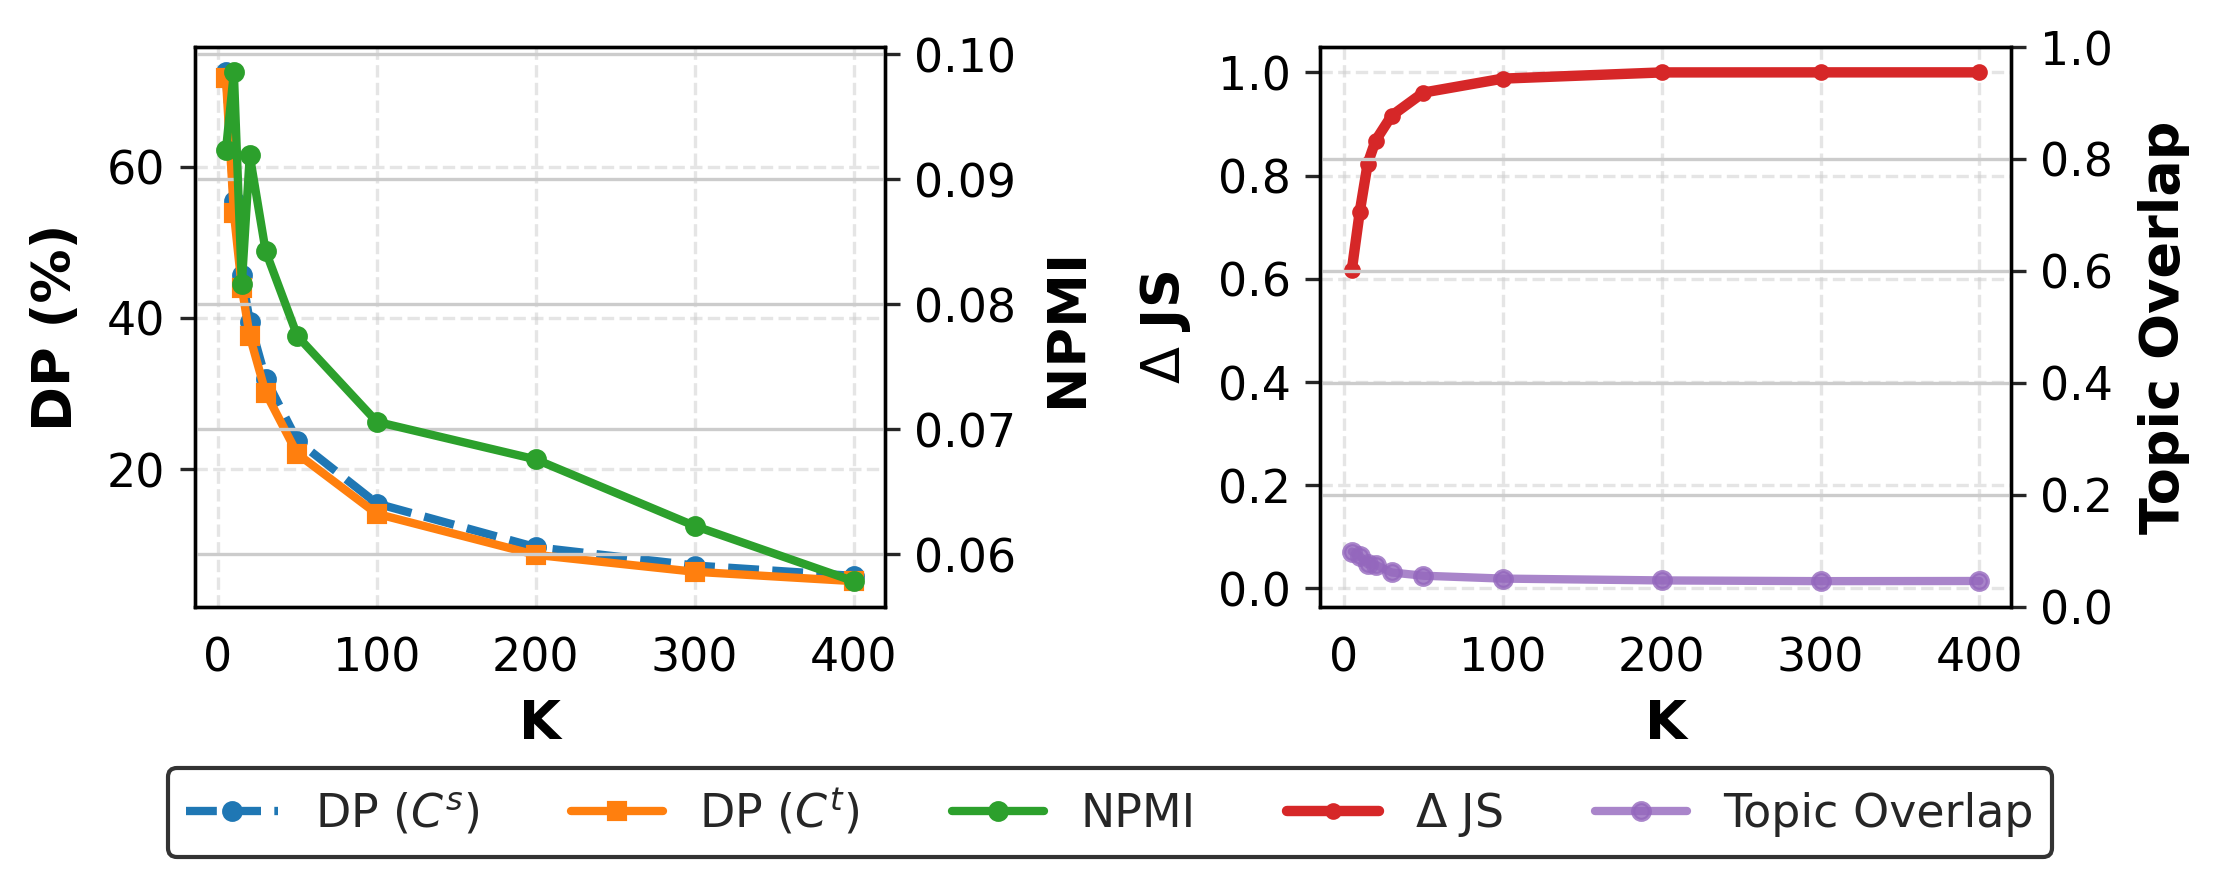

In [411]:
import matplotlib.ticker as ticker

colorblind_palette_ = plt.get_cmap("tab10")  # This is the colorblind-friendly Tableau 10 palette

colorblind_palette = {
    "Dispersion EN": colorblind_palette_(0),  
    "Dispersion ES": colorblind_palette_(1),  
    "Average Coherence": colorblind_palette_(2),  
    "Mean JS":colorblind_palette_(3),  
    "Topic Overlap": colorblind_palette_(4),  
}

# Update figure to add more x-axis labels for better readability
fig, axes = plt.subplots(1, 2, figsize=(7.5, 3), dpi=300)

### First subplot: Dispersion and Coherence ###
ax1 = axes[0]
ax1.set_xlabel('K', fontsize=13, fontweight='bold', color='black')
ax1.set_ylabel('DP (%)', fontsize=13, fontweight='bold', color='black', labelpad=6)
# Dispersion lines
l1, = ax1.plot(df['Num_Topics'], df['Dispersion EN'], label='DP ($C^s$)',
               color=colorblind_palette["Dispersion EN"], linestyle='--', marker='o', markersize=4, linewidth=2)
l2, = ax1.plot(df['Num_Topics'], df['Dispersion ES'], label='DP ($C^t$)',
               color=colorblind_palette["Dispersion ES"], linestyle='-', marker='s', markersize=4, linewidth=2)

ax1.tick_params(axis='y', labelcolor='black', labelsize=11)
ax1.tick_params(axis='x', labelcolor='black', labelsize=11)
ax1.grid(True, linestyle='--', alpha=0.5)

# Add more x-axis labels
#ax1.xaxis.set_major_locator(ticker.MultipleLocator(10))

# Secondary y-axis for Coherence
ax2 = ax1.twinx()
ax2.set_ylabel('NPMI', fontsize=13, fontweight='bold', color='black', labelpad=6)
l3, = ax2.plot(df['Num_Topics'], df['Average_Coherence'], label='NPMI',
               color=colorblind_palette["Average Coherence"], linestyle='-', marker='o', markersize=4, linewidth=2)
ax2.tick_params(axis='y', labelcolor='black', labelsize=11)

### Second subplot: Mean JS Similarity & Topic Overlap ###
ax3 = axes[1]
ax3.set_xlabel('K', fontsize=13, fontweight='bold', color='black')
ax3.set_ylabel('$\Delta$ JS', fontsize=13, fontweight='bold', color='black', labelpad=6)

# Plot Topic Overlap first (so it doesn't hide JS Similarity)
l5, = ax3.plot(df['Num_Topics'], df['Average_Topic_Overlap'], label='Topic Overlap',
               color=colorblind_palette["Topic Overlap"], linestyle='-', marker='o', markersize=4, linewidth=2, alpha=0.8)

# Now plot JS Similarity with a distinct color and thicker line
l4, = ax3.plot(df['Num_Topics'], df['Diff_Max_Min'], label='$\Delta$ JS',
               color=colorblind_palette["Mean JS"], marker='o', markersize=3, linewidth=2.5, alpha=1.0)

ax3.tick_params(axis='y', labelcolor='black', labelsize=11)
ax3.tick_params(axis='x', labelcolor='black', labelsize=11)
ax3.grid(True, linestyle='--', alpha=0.5)

# Add more x-axis labels
#ax3.xaxis.set_major_locator(ticker.MultipleLocator(10))

# Secondary y-axis for Topic Overlap (already plotted)
ax4 = ax3.twinx()
ax4.set_ylabel('Topic Overlap', fontsize=13, fontweight='bold', color='black', labelpad=6)
ax4.tick_params(axis='y', labelcolor='black', labelsize=11)

# Make x and y axis borders black
for spine in ax1.spines.values():
    spine.set_color('black')

# Make x and y axis borders black
for spine in ax2.spines.values():
    spine.set_color('black')

# Make x and y axis borders black
for spine in ax3.spines.values():
    spine.set_color('black')
    
# Make secondary y-axis border black
for spine in ax4.spines.values():
    spine.set_color('black')

### Unified Legend (Tighter Placement Below the Plots) ###
legend_handles = [l1, l2, l3, l4, l5]
legend_labels = [line.get_label() for line in legend_handles]

legend = fig.legend(legend_handles, legend_labels, loc='lower center', fontsize=11, ncol=5, frameon=True, bbox_to_anchor=(0.5, 0.005))

legend.get_frame().set_edgecolor('black')

"""
# ---- ADD ANNOTATIONS WITH BACKGROUND BOX ----
bbox_props = dict(boxstyle="round,pad=0.5", facecolor="lightgray", edgecolor="black", alpha=0.8)

for i, (x, y) in enumerate(zip(df['Num_Topics'], df['Average_Coherence'])):
    ax2.annotate(f"{x}", (x, y), textcoords="offset points", xytext=(0, 5), ha='center',
                 fontsize=4, bbox=bbox_props, zorder=10)

for i, (x, y) in enumerate(zip(df['Num_Topics'], df['Diff_Max_Min'])):
    ax3.annotate(f"{x}", (x, y), textcoords="offset points", xytext=(0, 5), ha='center',
                 fontsize=4,bbox=bbox_props,zorder=10)
"""

# Adjust layout for minimal empty space
plt.tight_layout(rect=[0, 0.1, 1, 1])

# Save final optimized figure
plt.savefig("topic_model_metrics.pdf", dpi=300, bbox_inches='tight')

# Show updated figure
plt.show()

In [76]:
"""
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Number of Topics')
ax1.set_ylabel('Dispersion', color=color)
ax1.plot(df['Num_Topics'], df['Dispersion'], color=color, marker='o', label='Dispersion')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Average Coherence', color=color)
ax2.plot(df['Num_Topics'], df['Average_Coherence'], color=color, marker='x', linestyle='--', label='Average Coherence')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()
"""

"\nfig, ax1 = plt.subplots()\n\ncolor = 'tab:blue'\nax1.set_xlabel('Number of Topics')\nax1.set_ylabel('Dispersion', color=color)\nax1.plot(df['Num_Topics'], df['Dispersion'], color=color, marker='o', label='Dispersion')\nax1.tick_params(axis='y', labelcolor=color)\nax1.legend(loc='upper left')\n\nax2 = ax1.twinx()\ncolor = 'tab:green'\nax2.set_ylabel('Average Coherence', color=color)\nax2.plot(df['Num_Topics'], df['Average_Coherence'], color=color, marker='x', linestyle='--', label='Average Coherence')\nax2.tick_params(axis='y', labelcolor=color)\nax2.legend(loc='upper right')\n\nplt.tight_layout()\nplt.show()\n"

## Score and so

In [77]:
lang = "EN"

In [78]:
model_name = "lda_rosie_1_15"
path_betas = f"/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/data/models/29_dec/LDA/{model_name}/mallet_output/{lang}/betas.npy"
betas = np.load(path_betas)

path_thetas = f"/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/data/models/29_dec/LDA/{model_name}/mallet_output/{lang}/thetas.npz"
thetas = sparse.load_npz(path_thetas).toarray()

In [79]:
thetas.shape

(1393097, 15)

In [80]:
def get_doc_top_tpcs(doc_distr, topn=10):
    sorted_tpc_indices = np.argsort(doc_distr)[::-1]
    top = sorted_tpc_indices[:topn].tolist()
    top_weight = [(k, doc_distr[k]) for k in top]
    return top_weight

def get_doc_main_topc(doc_distr):
    sorted_tpc_indices = np.argsort(doc_distr)[::-1]
    top = sorted_tpc_indices[:1][0]
    return top

In [81]:
path_source = pathlib.Path("/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/data/source/corpus_rosie/passages/29_dec/all/df_1.parquet")
df_raw = pd.read_parquet(path_source)

In [82]:
df_raw_en = df_raw[df_raw["doc_id"].str.contains(lang)]

corpus_en_path = pathlib.Path(f"/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/data/models/29_dec/LDA/{model_name}/train_data/corpus_{lang}.txt")
with open(corpus_en_path) as file:
    lines = file.readlines()
print(lines[0])
corpus_en = [el.strip().split(" 0 ")[1] for el in lines]
ids_en = [el.strip().split(" 0 ")[0].strip() for el in lines]

df_lang = pd.DataFrame(
    {
        "lemmas": corpus_en,
        "doc_id": ids_en,
    }
)

df_lang = df_raw_en.merge(df_lang, how="inner", on="doc_id")

df_lang["thetas"] = list(thetas)
df_lang["main_topic"] = df_lang["thetas"].apply(get_doc_main_topc)

EN_607595_99219-9 0 order avoid future allergic_reaction range vomit hive anaphylactic_shock rani family need remain_vigilant avoid exposure allergen time rani food option increase list food allergic grow



In [83]:
documents_texts = df_lang["lemmas_x"].apply(lambda x: x.split()).tolist()

ntopics = betas.shape[0]
size_vocab = betas.shape[1]
betas_ds = np.copy(betas)
if np.min(betas_ds) < 1e-12:
    betas_ds += 1e-12
deno = np.reshape((sum(np.log(betas_ds)) / ntopics), (size_vocab, 1))
deno = np.ones((ntopics, 1)).dot(deno.T)
betas_ds = betas_ds * (np.log(betas_ds) - deno)

# get weight of each word as maximum 
betas_word = np.max(betas, axis=0)
betas_word_ds = np.max(betas_ds, axis=0)

vocab_w2id = {}
vocab_id2w = {}
path_vocab = f"/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/data/models/29_dec/LDA/{model_name}/mallet_output/{lang}/vocab_freq.txt"

with open(path_vocab) as file:
    for i, line in enumerate(file):
        # Strip leading and trailing whitespace
        stripped_line = line.strip()
        # Split the line into words and numbers
        parts = stripped_line.split()
        if parts:
            # Get the word (first part)
            wd = parts[0]
            # Populate the dictionaries
            vocab_w2id[wd] = i
            vocab_id2w[str(i)] = wd
####
# SCORE
####

D = len(thetas)
doc_score = np.zeros((D, 1))

for doc in range(D):
    wd_ids = [vocab_w2id[word] for word in documents_texts[doc] if word in vocab_w2id]
    words_not_in_vocab = [word for word in documents_texts[doc] if word not in vocab_w2id]

    # try to split by '_' words in words_not_in_vocab
    additional_words = []
    for word in words_not_in_vocab:
        if "_" in word:
            additional_words += word.split("_")
            words_not_in_vocab.remove(word)
    wd_ids += [vocab_w2id[word] for word in additional_words if word in vocab_w2id]

    words_not_in_vocab = list(set(words_not_in_vocab))

    if len(words_not_in_vocab) >= 1:
        penalization = 1/len(words_not_in_vocab)
    else:
        penalization = 1

    #print("DOCUMENT: ", documents_texts[doc])
    #print("WORDS NOT IN VOCAB: ", words_not_in_vocab)
    
    # Skip documents with no valid words
    if len(wd_ids) <= 1:
        doc_score[doc] = 0  # Or any default score for empty documents
        continue

    #print("BETAS WORD: ", betas_word[wd_ids])
    #print("PENALIZATION: ", penalization)

    #denominator = len(wd_ids) #np.log(len(wd_ids) + 1e-10)  # Small epsilon to prevent log(0)
    denominator = len(list(set(wd_ids))) #np.log(len(wd_ids) + 1e-10)  # Small epsilon to prevent log(0)
    #print("DENOM: ", denominator)
    #weights = [betas_word_ds[wd_id] * get_tfidf_value(vocab_id2w[str(wd_id)], doc) for wd_id in wd_ids]
    doc_score[doc] = (np.sum(betas_word_ds[wd_ids]) *  penalization)/ denominator
    #doc_score[doc] = (np.sum(weights) *  penalization)/ denominator
    #print("DOC SCORE: ", doc_score[doc])

    #import pdb; pdb.set_trace()

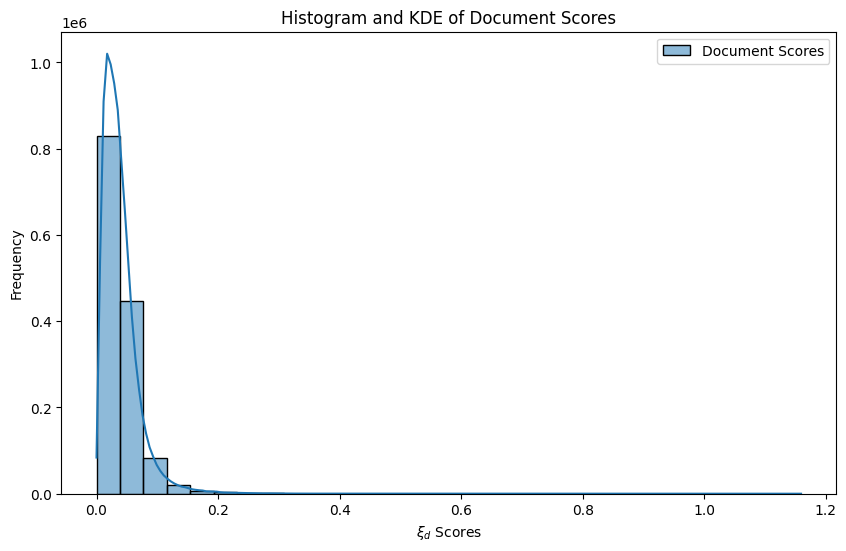

Mean (μ): 0.039
Standard Deviation (σ): 0.031
Threshold (μ - σ): 0.008
Threshold (10th Percentile): 0.011
Number of irrelevant documents (μ - σ): 83217
Number of irrelevant documents (10th Percentile): 139310


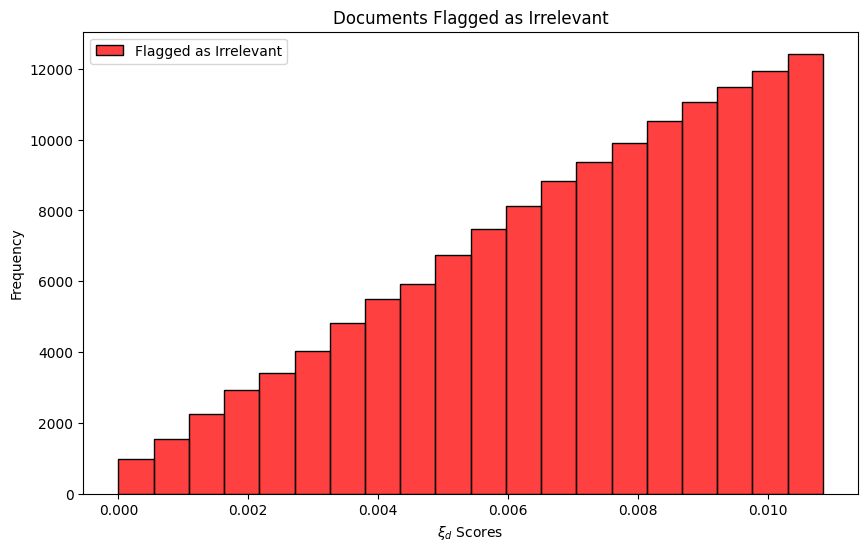

In [84]:
# KDE of the scores
document_scores = doc_score
plt.figure(figsize=(10, 6))
sns.histplot(doc_score, kde=True, bins=30, color='blue', label='Document Scores')
plt.title('Histogram and KDE of Document Scores')
plt.xlabel('$\\xi_d$ Scores')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Step 3: Set a tentative threshold
mean_score = np.mean(document_scores)
std_score = np.std(document_scores)
threshold_mu_sigma = mean_score - std_score
threshold_percentile = np.percentile(document_scores, 10)

print(f"Mean (\u03bc): {mean_score:.3f}")
print(f"Standard Deviation (\u03c3): {std_score:.3f}")
print(f"Threshold (\u03bc - \u03c3): {threshold_mu_sigma:.3f}")
print(f"Threshold (10th Percentile): {threshold_percentile:.3f}")

# Step 4: Identify documents below the thresholds
irrelevant_mu_sigma = document_scores[document_scores < threshold_mu_sigma]
irrelevant_percentile = document_scores[document_scores < threshold_percentile]

print(f"Number of irrelevant documents (\u03bc - \u03c3): {len(irrelevant_mu_sigma)}")
print(f"Number of irrelevant documents (10th Percentile): {len(irrelevant_percentile)}")

# Step 5: Iterate and review (Manual inspection required)
# Example: Plot documents flagged as irrelevant for visual inspection
plt.figure(figsize=(10, 6))
sns.histplot(irrelevant_percentile, kde=False, bins=20, color='red', label='Flagged as Irrelevant')
plt.title('Documents Flagged as Irrelevant')
plt.xlabel('$\\xi_d$ Scores')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [85]:
df_lang["doc_score"] = doc_score

In [86]:
"""
df_lang["doc_score"] = doc_score
labelled = df_lang[df_lang.doc_score < np.percentile(doc_score,1)]
labelled[["doc_id", "text", "doc_score"]]
"""

'\ndf_lang["doc_score"] = doc_score\nlabelled = df_lang[df_lang.doc_score < np.percentile(doc_score,1)]\nlabelled[["doc_id", "text", "doc_score"]]\n'

In [87]:
"""
seed = 1234
mean_score_bad = np.mean(labelled.doc_score.values.tolist())
print(f"MEAN SCORE BAD: {mean_score_bad}")

path_save = f"annotations_{lang.lower()}_good.csv"
if pathlib.Path(path_save).is_file():
    good_labelled = pd.read_csv(pathlib.Path(path_save))
else:
    good_labelled = df_lang[df_lang.doc_score > mean_score_bad].sample(n=1000, random_state=seed)
    good_labelled["label"] = [1] * len(good_labelled)
    good_labelled.to_csv(path_save)
    """

'\nseed = 1234\nmean_score_bad = np.mean(labelled.doc_score.values.tolist())\nprint(f"MEAN SCORE BAD: {mean_score_bad}")\n\npath_save = f"annotations_{lang.lower()}_good.csv"\nif pathlib.Path(path_save).is_file():\n    good_labelled = pd.read_csv(pathlib.Path(path_save))\nelse:\n    good_labelled = df_lang[df_lang.doc_score > mean_score_bad].sample(n=1000, random_state=seed)\n    good_labelled["label"] = [1] * len(good_labelled)\n    good_labelled.to_csv(path_save)\n    '

In [88]:
"""
seed = 1234
path_save = f"annotations_{lang.lower()}.csv"
if pathlib.Path(path_save).is_file():
    labelled_sample = pd.read_csv(pathlib.Path(path_save))
else:
    labelled_sample = labelled.sample(n=1000, random_state=seed)
    labelled_sample["label"] = [0] * len(labelled_sample)


start = 780
counter = 0
for id_, row in labelled_sample.iterrows():
    if counter > start:
        print(f"ID: {id_}, counter: {counter}: {row.text}")
        label = input("-- Input label: ")
        labelled_sample.loc[id_, "label"] = int(label)
    
        if counter % 10 == 0:
            labelled_sample.to_csv(path_save)
    counter +=1
"""

'\nseed = 1234\npath_save = f"annotations_{lang.lower()}.csv"\nif pathlib.Path(path_save).is_file():\n    labelled_sample = pd.read_csv(pathlib.Path(path_save))\nelse:\n    labelled_sample = labelled.sample(n=1000, random_state=seed)\n    labelled_sample["label"] = [0] * len(labelled_sample)\n\n\nstart = 780\ncounter = 0\nfor id_, row in labelled_sample.iterrows():\n    if counter > start:\n        print(f"ID: {id_}, counter: {counter}: {row.text}")\n        label = input("-- Input label: ")\n        labelled_sample.loc[id_, "label"] = int(label)\n    \n        if counter % 10 == 0:\n            labelled_sample.to_csv(path_save)\n    counter +=1\n'

In [89]:
# Save all
"""
output_columns = [
    'id_top', 'doc_id', 'id_preproc', 'document_id', 'text', 'len', 
    'full_doc', 'human_labeled', 'lemmas_x', 'lemmas_tr', 'text_tr', 
    'lang', 'final_label', 'common_id', 'lemmas_y', 'thetas', 
    'main_topic', 'doc_score'
]

df_lang[output_columns].to_csv(f"all_{lang.lower()}.csv", index=False)
"""

'\noutput_columns = [\n    \'id_top\', \'doc_id\', \'id_preproc\', \'document_id\', \'text\', \'len\', \n    \'full_doc\', \'human_labeled\', \'lemmas_x\', \'lemmas_tr\', \'text_tr\', \n    \'lang\', \'final_label\', \'common_id\', \'lemmas_y\', \'thetas\', \n    \'main_topic\', \'doc_score\'\n]\n\ndf_lang[output_columns].to_csv(f"all_{lang.lower()}.csv", index=False)\n'

# Applyng filtering

In [90]:
import pathlib
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.utils import shuffle
import pandas as pd
import scipy.sparse as sparse
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [101]:
labels = pd.read_excel("/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/src/topic_modeling/labels/annotations_en.xlsx")[['id_top', 'doc_id', 'text', 'label']]

In [102]:
labels

,id_top,doc_id,text,label
0,644573,EN_208337_47461-44,"Abbreviations: CI, confidence interval; PPD, potentially postponable deaths; LVEF, left ventricular ejection fraction; ACE, angiotensin-converting enzyme; ICD, implantable cardioverter-defibrillator. a The plausible range of the estimate is the 95% confidence interval if available and ±20% of the expected value when confidence intervals were not available. b All current implementation estimates are from Kottke et al (4). c Knoops et al (21). d Doll and Peto (22). e Andersen et al (23).f Kottke et al (24). g Antikainen et al (25). h Anti-thrombotic Trialist Collaborative (26). i Freemantle et al (27). j Baigent et al (28). k Critchley et al (29). l Yusuf et al (30). m GISSI investigators (31). n Wannamethee et al (32). o Flather et al (18). p Pitt et al (33). q Belardinelli et al (34). r Lam et al (35).",0
1,292459,EN_125430_43745-84,MODERATOR: Thank you. We'll move on to the line of Jennifer Warner with WebMD. Please go ahead.,0
2,415274,EN_563100_92614-68,"Di Maria MV, Goldberg DJ, Paridon S, Lubert A, Dragulescu A, Mackie AS, McCrary A, Weingarten A, Parthiban A, Goot B, Goldstein BH, Taylor C, Lindblade C, Petit C, Spurney C, Harrild DM, Urbina EM, Schuchardt E, Trachtenberg F, Kim GB, Yoon JK, Colombo JN, Wang K, Files MD, Schoessling M, Ermis PR, Wong P, Garg R, Swanson S, Menon SC, Srivastava S, Thorsson T, Johnson T, Krishnan U, Frommelt PC: Impact of Udenafil on Echocardiographic Indices of Single Ventricle Size and Function in FUEL Study Participants. Circulation 2020.",0
3,20593,EN_508683_12712-284,"Biswas K, Mark C, Peng SS [Mar 1999]. A unique approach to determining the time dependent in situ strength of coal pillars. SME preprint 99-184. Littleton, CO: Society for Mining, Metallurgy, and Exploration, Inc.",0
4,1346641,EN_591619_96854-111,"Keller M, Glessner J, Resnick E, Perez E, Chapel H, Lucas M, Sullivan KE, Cunningham-Rundles C, Orange JS, Hakonarson H. : Burden of copy number variation in common variable immunodeficiency. doi: 10.1111/cei.12255. Clin Exp Immunol. 177(1): 269-71, Jul 2014.",0
...,...,...,...,...
1995,1255176,EN_1265942_282452-4,"Most ATP1A3 gene mutations associated with alternating hemiplegia of childhood change single protein building blocks (amino acids) in the alpha-3 subunit of Na+/K+ ATPase. These genetic changes appear to impair the pump's ability to transport ions, although it is unclear how the mutations lead to the specific features of alternating hemiplegia of childhood.",1
1996,1179842,EN_50144_31331-74,"You may wish to check with state general counsel on whether the outside entity qualifies as a designated bona fide agent; alternatively, the county may apply and continue collaborating with the entity.",0
1997,937890,EN_358588_55758-31,"** Within COVID-19 electronic laboratory reporting data: state was assigned using location of the state health department that reported the test (available for 100% of tests), specimen collection date was used to assign date (available for approximately 98% of tests), and records with missing specimen collection data were excluded. Within data submitted directly by public health, commercial, and reference laboratories: state was assigned using patient location for 96% of tests, provider location was substituted for 1%, and records with both location fields missing (3%) were excluded; order date was used for 80% of tests, specimen collection date was substituted for 19%, and records with both date fields missing (1%) were excluded.",0
1998,221703,EN_1159732_20640-16,"No, you do not need to download an app to use v-safe. Anyone with a smart phone with internet access and text messaging service who received a COVID-19 vaccine and is located in the United States can participate in v-safe via their smartphone’s browser.",0


In [103]:
df_train = labels.merge(df_lang, on="doc_id", how="left", suffixes=("", "_right"))
df_train = df_train[[col for col in df_train.columns if not col.endswith("_right")]]
df_train["method"] = ["manually_labelled"] * len(df_train)
df_train.columns

Index(['id_top', 'doc_id', 'text', 'label', 'id_preproc', 'document_id', 'len',
       'full_doc', 'human_labeled', 'lemmas_x', 'lemmas_tr', 'text_tr', 'lang',
       'final_label', 'common_id', 'lemmas_y', 'thetas', 'main_topic',
       'doc_score', 'method'],
      dtype='object')

In [104]:
df_predict = df_lang[~df_lang["doc_id"].isin(labels["doc_id"])]

In [105]:
# Parse the thetas column
def parse_thetas(row):
    return np.array([float(x) for x in row])

In [106]:
# Training data
texts_train = df_train.lemmas_x.values.tolist()
labels_train = df_train.label.values.tolist()
texts_train_no_lemmas = df_train.text.values.tolist()
thetas_train = np.array(df_train["thetas"].apply(parse_thetas).tolist())
outside_matrix_train = sparse.csr_matrix(thetas_train)
scores_train = sparse.csr_matrix(df_train.doc_score.values.reshape(-1, 1))

# Test data
texts_test = df_predict.lemmas_x.values.tolist()
texts_test_no_lemmas = df_predict.text.values.tolist()
thetas_test = np.array(df_predict["thetas"].apply(parse_thetas).tolist())
outside_matrix_test = sparse.csr_matrix(thetas_test)
scores_test = sparse.csr_matrix(df_predict.doc_score.values.reshape(-1, 1))

# Shuffle the training data
texts_train, labels_train, outside_matrix_train, scores_train, texts_train_no_lemmas = shuffle(
    texts_train, labels_train, outside_matrix_train, scores_train, texts_train_no_lemmas, random_state=42
)

# TF-IDF Vectorizer
print("Vectorizing text data...")
tfidf = TfidfVectorizer()

# Transform the text data
X_train_tfidf = tfidf.fit_transform(texts_train)
X_test_tfidf = tfidf.transform(texts_test)

print("TF-IDF shape:", X_train_tfidf.shape)

# Concatenate sparse matrices: TF-IDF features and outside matrix
X_train = sparse.hstack([X_train_tfidf, outside_matrix_train])
X_test = sparse.hstack([X_test_tfidf, outside_matrix_test])

print("Final train shape:", X_train.shape)
print("Final test shape:", X_test.shape)

# Define the SVM model
svm = SVC(probability=True)

# Define the parameter grid for optimization
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
}

# Grid Search with Cross-Validation
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', verbose=2)

# Train the model
print("Training the model...")
grid_search.fit(X_train, labels_train)

# Best parameters and accuracy
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

Vectorizing text data...
TF-IDF shape: (2000, 20099)
Final train shape: (2000, 20114)
Final test shape: (1391097, 20114)
Training the model...
Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   1.5s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   1.5s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   1.5s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   1.5s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   1.5s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   2.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   2.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   2.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   2.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total

In [107]:
# Evaluate on the test set
best_model = grid_search.best_estimator_

# Get probabilities for the test set
probabilities = best_model.predict_proba(X_test)

# Extract the probabilities for the positive class
positive_class_probabilities = probabilities[:, 1]

# Define the custom threshold for positive classification
threshold = 0.5

# Apply the threshold
custom_predictions = (positive_class_probabilities > threshold).astype(int)

# Save predictions along with the probabilities and text
test_df = pd.DataFrame({
    'lemmas': texts_test,
    'text': texts_test_no_lemmas,
    'predicted_probability': positive_class_probabilities,
    'label': custom_predictions,
    'method': ["predicted"] * len(custom_predictions)
})

In [108]:
df_predict["predicted_probability"] = positive_class_probabilities
df_predict["label"] = custom_predictions
df_predict["method"] = ["predicted"] * len(custom_predictions)

/tmp/ipykernel_2209273/2240416002.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predict["predicted_probability"] = positive_class_probabilities
/tmp/ipykernel_2209273/2240416002.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predict["label"] = custom_predictions
/tmp/ipykernel_2209273/2240416002.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

In [109]:
df_predict.to_parquet("labels/all_en_with_pred.parquet")

In [110]:
en = pd.read_parquet("labels/all_en_with_pred.parquet")
es = pd.read_parquet("labels/all_es_with_pred.parquet")

In [114]:
df_save = pd.concat([en[en.label==1], es[es.label==1]])
len(df_save)

1050088

In [116]:
df_save.columns

Index(['id_top', 'doc_id', 'id_preproc', 'document_id', 'text', 'len',
       'full_doc', 'human_labeled', 'lemmas_x', 'lemmas_tr', 'text_tr', 'lang',
       'final_label', 'common_id', 'lemmas_y', 'thetas', 'main_topic',
       'doc_score', 'predicted_probability', 'label', 'method'],
      dtype='object')

In [117]:
df_save.rename(columns={'lemmas_x': 'lemmas'}, inplace=True)
df_save.drop(columns=['lemmas_y'], inplace=True) 

In [215]:
#path_source_new = "/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/data/source/corpus_rosie/passages/26_jan/df_1.parquet"
#df_save.to_parquet(path_source_new)
path_graph = "/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/data/models/28_jan/poly_rosie_1_30/df_graph_es.parquet"
df = pd.read_parquet(path_graph)
len(df)

333175

In [216]:
path_nodes = "/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/data/models/28_jan/poly_rosie_1_30/graph_spanish_nodes.csv"
df_nodes = pd.read_csv(path_nodes)
df_nodes["label"] = df.label.values.tolist()
df_nodes.to_csv("/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/src/qa_system/graph_spanish_nodes_labels.csv")

In [ ]:
duplicates = df_save[df_save["text"].duplicated(keep=False)]

#print("Duplicates based on 'text':")
#print(duplicates)

In [132]:
unique_df = df_save.drop_duplicates(subset="text", keep="first")

In [156]:
len(df_save) - len(unique_df)

174858

In [133]:
unique_df.to_parquet(path_source_new)

In [154]:
len(unique_df)

875230

In [159]:
orig = pd.read_json("/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/data/source/corpus_rosie/corpus_strict_v2.0_es_compiled_passages.jsonl",lines=True)

In [164]:
orig

,passage_id,passage,title,url
0,1-6,Shop Log In Create an Account For Ophthalmologists For Practice Management For Clinical Teams For Public & Patients About Foundation Museum of the Eye A - Z de Salud Ocular Síntomas Anteojos y Lentes de Contacto Consejos y Prevención Noticias Relatos de Pacientes Exámenes de la Vista Sin Costo English Salud Ocular / Relatos de Pacientes Email Relatos de Pacientes Se restauró la visión con tejido placentario Mas Relatos de Pacientes James: El queratocono Peggy: La cirugía de glaucoma Cooper: La retinoblastoma Te': La infección de los lentes de contacto Jackson: Lesión Ocular Angellia: El desprendimiento de retina Todos Relatos de Pacientes Read in English: Patient Stories Encontrar un oftalmólogo Search Búsqueda Avanzada Contact Us About the Academy Jobs at the Academy Financial Relationships with Industry Descargo de Responsabilidad Médica Política de Privacidad Términos de Servicio Statement on Artificial Intelligence Help For Advertisers For Media Ophthalmology Job Center OUR SITES EyeWiki FOLLOW THE ACADEMY Medical Professionals Public & Patients Museum of the Eye © American Academy of Ophthalmology 2023,Relatos de Pacientes,https://www.aao.org/salud-ocular/relatos-de-pacientes
1,2-6,"Shop Log In Create an Account For Ophthalmologists For Practice Management For Clinical Teams For Public & Patients About Foundation Museum of the Eye A - Z de Salud Ocular Síntomas Anteojos y Lentes de Contacto Consejos y Prevención Noticias Relatos de Pacientes Exámenes de la Vista Sin Costo English Salud Ocular / Noticias Noticias 1-20 of 218 results 1 2 3 4 5 Next » El envenenamiento por mercurio de los productos de belleza no regulados, puede causar pérdida de la visión, advierte la FDA OCT 12, 2023 por Vered Hazanchuk Altas cantidades de mercurio pueden causar varias complicaciones de salud, incluyendo daño ocular. Prescripción para mantener a los niños sin gafas: sol OCT 04, 2023 por Susanne Medeiros Cada paciente que acude a la oftalmóloga pediátrica Dra. Noha Ekdawi, recibe la misma receta: pase más tiempo al aire libre. Las pistolas de paintball, pistolas de juguete y otros juguetes proyectivos causan lesiones oculares graves y ceguera APR 10, 2023 por Kierstan Boyd , Dan Gudgel El número de lesiones en los ojos por pistolas de aire se ha incrementado en forma exponencial en los últimos años, haciendo que los expertos exijan protección ocular obligatoria. Un informe publicado en una revista médica refuerza la importancia de lo que la Academia Americ… La demora es el punto: Un oftalmólogo se enfrenta a una abusiva aseguradora de salud.",Noticias,https://www.aao.org/salud-ocular/noticias-lista
2,2-7,"Apenas SEP 28, 2022 por Brandon Johnson, MD Aetna, la tercera aseguradora más grande del país, decidió ampliar la autorización previa para una variedad de cirugías a partir del 1 de julio, incluyendo todas las cirugías de cataratas. Los oftalmólogos marcan la diferencia en la lucha contra el cambio climático SEP 28, 2022 por Susanne Medeiros ¿Puede una persona hacer algún tipo de diferencia significativa en la lucha contra el cambio climático? Este oftalmólogo abordó el tema de los desperdicios innecesarios en la cirugía oftalmológica. Es hora de legalizar los ojos de los homosexuales SEP 28, 2022 por Susanne Medeiros El oftalmólogo Dr. Michael Puente, Jr., aún era residente cuando escuchó la historia de A.J. Betts, un chico de 16 años de Des Moines, Iowa, que se suicidó después de soportar años de acoso por ser diferente. Los trastornos de la alimentación pueden aumentar el riesgo de retinopatía diabética SEP 20, 2022 por Reena Mukamal Según un reciente estudio, someterse a exámenes oculares regulares e informar a su médico sobre los trastornos de la alimentación, puede ayudar a salvar su visión. Esto es lo que significan Niños con diabetes tipo 2 en riesgo de enfermedad ocular SEP 18, 2022 por Reena Mukamal Según un nuevo estudio, los niños con diabetes tipo 2 tienen casi el doble de probabilidades de 

In [171]:
duplicates_orig = orig[orig["passage"].duplicated(keep=False)]

# Group by "passage" and select the first two occurrences
duplicates_first_two = duplicates_orig.groupby("passage").head(2)

# Display the result
duplicates_first_two

,passage_id,passage,title,url
14,4-3,"Al ayudar a enfocar la luz que entra en el ojo, tanto la córnea como el lente juegan un papel importante en darnos una visión clara. De hecho, el 70% del poder de enfoque del ojo proviene de la córnea, y el 30% del lente.",Anteojos y Lentes de Contacto,https://www.aao.org/salud-ocular/anteojos-lentes-de-contacto-lista
75,10-1,Lea una descripción general de la anatomía del ojo para saber cómo funcionan en conjunto las distintas partes del ojo.,Vítreo,https://www.aao.org/salud-ocular/anatomia/vitreo
77,11-1,Lea una descripción general de la anatomía del ojo para saber cómo funcionan en conjunto las distintas partes del ojo.,Uvea,https://www.aao.org/salud-ocular/anatomia/uvea
281,24-9,"Algunas investigaciones han demostrado que la vitamina A puede demorar la progresión de ciertas formas de RP, pero existe la preocupación de que una alta ingestión de la misma pueda conducir a que otras condiciones oculares empeoren. Su oftalmólogo puede aconsejarle sobre los riesgos y las ventajas de la vitamina A, y la cantidad que puede tomar sin riesgos. Tomar demasiada vitamina A puede ser perjudicial, y la evidencia del efecto de la vitamina A en la progresión de la RP no es sustancial. Actualmente, los suplementos de vitamina A no son recomendados.",Síndrome de Usher,https://www.aao.org/salud-ocular/enfermedades/el-sindrome-de-usher
302,26-9,"Efectos secundarios de las pastillas de esteroides: Las pastillas esteroides son medicina “sistémica,” lo que significa que pueden afectar todo el cuerpo y no solamente las áreas que necesitan tratamiento (como el uso de ungüentos para el corte de un dedo). Esto puede causar efectos secundarios tales como:",Tabletas de esteroides,https://www.aao.org/salud-ocular/medicamentos/tabletas-de-esteroides
...,...,...,...,...
1064783,121099-33,Puede encontrar más información y apoyo para personas con obesidad y sus familias en: Obesity Action Coalition -- www.obesityaction.org/community/find-support-connect/find-a-support-group/.,obesidad,https://medlineplus.gov/spanish/ency/article/007297.htm
1064784,125553-0,"Las siguientes organizaciones son buenos recursos para obtener información sobre enfermedades renales:\n- American Geriatrics Society's Health in Aging Foundation -- www.healthinaging.org/a-z-topic/kidney-problems\n- Fondo Americano del Riñón (American Kidney Fund) -- www.kidneyfund.org/es\n- Centros de Control y Prevención de Enfermedades (de los Estados Unidos) (US Centers for Disease Control and Prevention) -- www.cdc.gov/kidneydisease/basics.html\n- Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales (National Institute of Diabetes and Digestive and Kidney Disease) -- www.niddk.nih.gov/health-information/informacion-de-la-salud/enfermedades-rinones\n- Fundación Nacional del Riñón (National Kidney Foundation) -- www.kidney.org/es/espanol\n- Biblioteca Nacional de Medicina de EE. UU., MedlinePlus (US National Library of Medicine, MedlinePlus) -medlineplus.gov/spanish/kidneydiseases.html.",Recursos para la nefropatía,https://medlineplus.gov/spanish/ency/article/002172.htm
1064785,125580-0,"Las siguientes organizaciones brindan mayor información sobre la artritis:\n- American Academy of Orthopaedic Surgeons -- orthoinfo.aaos.org/en/diseases--conditions/?topic=Arthritis\n- Fundación de artritis (Arthritis Foundation) -- espanol.arthritis.org/\n- Centros de Control y Prevención de Enfermedades (de los Estados Unidos) (Centers for Disease Control and Prevention) -- www.cdc.gov/arthritis/ https://www.cdc.gov/arthritis/spanish/\n- Instituto Nacional de Artritis y Enfermedades Musculoesqueléticas y de la Piel (National Institute of Arthritis and Musculoskeletal and Skin Diseases) -- www.niams.nih.gov/es/informacion-de-salud/artritis\n- Biblioteca Nacional de Medicina de EE. UU., MedlinePlus (US National Library of Medicine, MedlinePlus) -- medlineplus.gov/spanish/arthritis.html.",Recursos para la artritis,https://medlineplus.gov/spanish/ency/article/002183.ht

In [218]:
S = sparse.load_npz("/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/data/models/28_jan/poly_rosie_1_30/similarity_matrix_english.npz")

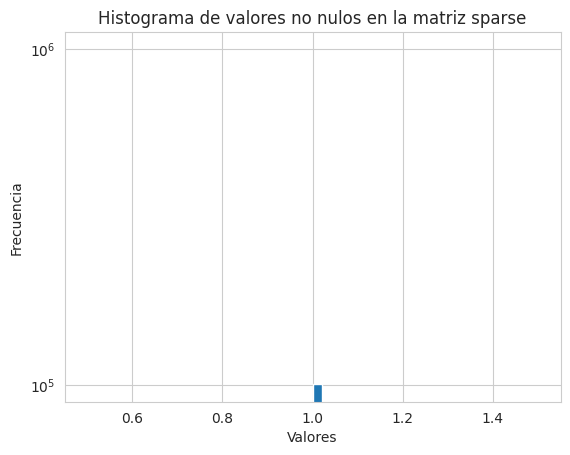

In [219]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix

# Ejemplo de matriz sparse
rows, cols = 10000, 10000  # Matriz grande
density = 0.001  # Densidad de valores no nulos
matrix = csr_matrix(np.random.rand(rows, cols) < density, dtype=np.float32)

# Obtener los valores no nulos sin convertir la matriz a densa
values = matrix.data

# Graficar el histograma
plt.hist(values, bins=50, log=True)  # Usa log=True si hay valores con frecuencias muy diferentes
plt.xlabel("Valores")
plt.ylabel("Frecuencia")
plt.title("Histograma de valores no nulos en la matriz sparse")
plt.show()

In [226]:
import numpy as np
import scipy.sparse as sp

# Example sparse matrix
matrix = sp.random(100, 100, density=0.1, format="csr")  # Random sparse matrix

# Check if there are values smaller than 1
has_smaller_than_1 = np.any(matrix.data < 1)
print("Are there values smaller than 1?", has_smaller_than_1)
count_smaller_than_1 = np.sum(matrix.data < 1)
print(f"Number of values smaller than 1: {count_smaller_than_1}")
min_value = matrix.data.min()
print(f"Minimum value in the sparse matrix: {min_value}")

Are there values smaller than 1? True
Number of values smaller than 1: 1000
Minimum value in the sparse matrix: 0.0017552375554297228


/home/lbartolome/lingaenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


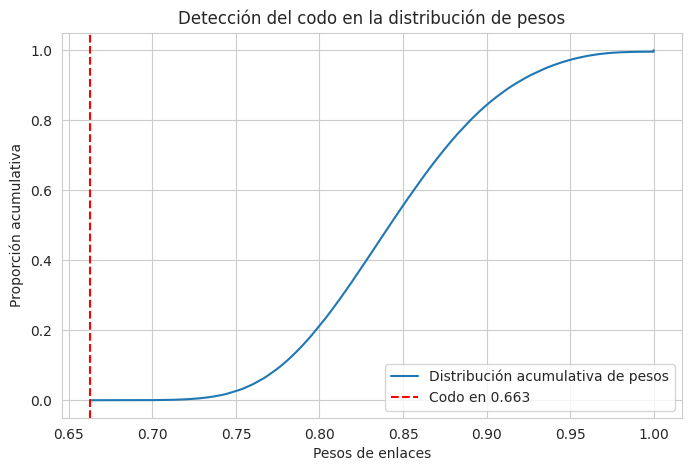

Punto de codo detectado en: 0.663


In [227]:
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt
from kneed import KneeLocator

def analyze_weight_distribution(sparse_matrix):
    """
    Analiza la distribución de pesos en una matriz sparse y detecta el codo.
    
    Args:
        sparse_matrix (scipy.sparse.csr_matrix): Matriz de adyacencia en formato CSR.

    Returns:
        float: Punto de codo encontrado en la distribución de pesos.
    """
    # Obtener los valores no nulos
    weights = np.sort(sparse_matrix.data)  # Ordenamos los pesos de menor a mayor
    
    # Crear la curva acumulativa de los pesos
    x = np.linspace(0, 1, len(weights))  # Valores normalizados en el eje X
    y = np.cumsum(weights) / np.sum(weights)  # Distribución acumulativa de los pesos
    
    # Detectar el punto de codo
    kneedle = KneeLocator(x, y, curve="concave", direction="increasing")
    elbow_point = kneedle.elbow  # Obtener el valor del codo en X

    # Obtener el peso correspondiente al codo
    elbow_weight = weights[int(elbow_point * len(weights))] if elbow_point is not None else None

    # Graficar la curva acumulativa con el codo marcado
    plt.figure(figsize=(8, 5))
    plt.plot(weights, y, label="Distribución acumulativa de pesos")
    if elbow_weight is not None:
        plt.axvline(x=elbow_weight, color="red", linestyle="--", label=f"Codo en {elbow_weight:.3f}")
    plt.xlabel("Pesos de enlaces")
    plt.ylabel("Proporción acumulativa")
    plt.title("Detección del codo en la distribución de pesos")
    plt.legend()
    plt.show()

    return elbow_weight

elbow = analyze_weight_distribution(S)
print(f"Punto de codo detectado en: {elbow:.3f}")

In [229]:
df =  pd.read_parquet("/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/data/source/corpus_rosie/passages/26_jan/df_1.parquet")
print(len(df[df.doc_id.str.contains("EN")]))
print(len(df[df.doc_id.str.contains("ES")]))

542055
333175
